In [26]:
import numpy as np
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [12]:
# load data 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index         = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire   = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_newswire[:100])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987


In [27]:
# vectorize
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# One-hot-encode data 
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [55]:
# network architecture 
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# # add optimizer, loss fn, metrics 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# validation data 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# model fit 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.2051 - accuracy: 0.5208 - val_loss: 1.4178 - val_accuracy: 0.6720
Epoch 2/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.1414 - accuracy: 0.7484 - val_loss: 1.1169 - val_accuracy: 0.7530
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.8079 - accuracy: 0.8226 - val_loss: 0.9832 - val_accuracy: 0.7750
Epoch 4/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.5860 - accuracy: 0.8741 - val_loss: 0.9368 - val_accuracy: 0.7850
Epoch 5/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.4228 - accuracy: 0.9110 - val_loss: 0.8814 - val_accuracy: 0.8160
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.3263 - accuracy: 0.9283 - val_loss: 0.8970 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 156us/step - loss

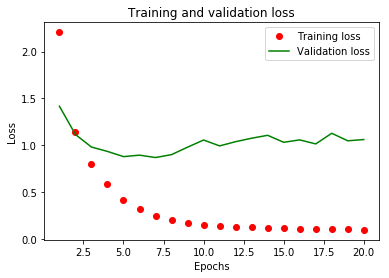

In [56]:
# plot lost (cross-entropy) 
history_dict    = history.history
loss_values     = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
acc             = history_dict['accuracy']
epochs          = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NOTE: OOS performance deteriorates after ~ 4 epochs 

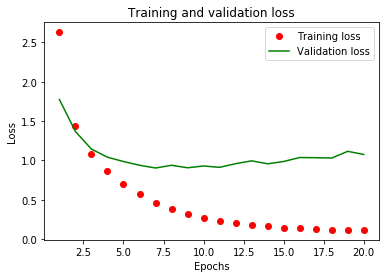

In [32]:
# plot lost (cross-entropy) 
history_dict    = history.history
loss_values     = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
acc             = history_dict['accuracy']
epochs          = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NOTE: OOS performance deteriorates after ~ 4 epochs 

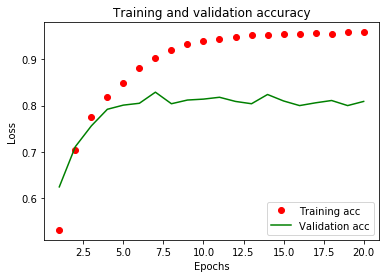

In [33]:
# plot accuracy 
acc_values     = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NOTE: OOS performance deteriorates after ~ 4 epochs 

In [34]:
# retrain from scratch (truncate at 9 epochs)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 156us/step - loss: 2.5523 - accuracy: 0.5224 - val_loss: 1.6771 - val_accuracy: 0.6500
Epoch 2/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.3584 - accuracy: 0.7154 - val_loss: 1.2679 - val_accuracy: 0.7340
Epoch 3/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.0093 - accuracy: 0.7894 - val_loss: 1.1361 - val_accuracy: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.7919 - accuracy: 0.8338 - val_loss: 1.0578 - val_accuracy: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.6320 - accuracy: 0.8685 - val_loss: 0.9599 - val_accuracy: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5085 - accuracy: 0.8949 - val_loss: 0.9116 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.409

In [35]:
results #(val_loss, val_acc)

[1.014305596041658, 0.777827262878418]